### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
Data = pd.read_csv("C:\\Users\\EXCELL  COMPUTERS\\Programming_Data_Science\\CSV_Files\\Churn_Modelling_deep_learning.csv")

In [3]:
pd.options.display.max_rows = 120000

In [4]:
Data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data type checking

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Null data checking

In [6]:
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Converting categorical data

In [7]:
Data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
Data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [9]:
C_gender = pd.get_dummies(Data['Gender'],dtype=int)

In [10]:
C_gender.head(5)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
Data = pd.concat([Data,C_gender],axis=1)

In [12]:
Data = Data.drop(['Gender'],axis=1)

In [13]:
Data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
columns = ['RowNumber','CustomerId','Surname']
Data = Data.drop(columns,axis=1)

In [15]:
Data.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
mapp = {'France':1,'Spain':2,'Germany':3}
Data['Geography'] = Data['Geography'].map(mapp)

In [17]:
Data.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
Data['Categorical_Salary'] = pd.qcut(Data['EstimatedSalary'],5)

In [19]:
Data.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,Categorical_Salary
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,"(80238.34, 119710.038]"
1,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0,"(80238.34, 119710.038]"
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,"(80238.34, 119710.038]"
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,"(80238.34, 119710.038]"
4,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0,"(41050.736, 80238.34]"


In [20]:
Data['Categorical_Salary'].unique()

[(80238.34, 119710.038], (41050.736, 80238.34], (119710.038, 159836.726], (11.579, 41050.736], (159836.726, 199992.48]]
Categories (5, interval[float64, right]): [(11.579, 41050.736] < (41050.736, 80238.34] < (80238.34, 119710.038] < (119710.038, 159836.726] < (159836.726, 199992.48]]

In [21]:
Iteration = [Data]
for dataset in Iteration:
    dataset.loc[(dataset['EstimatedSalary'] <= 41050.736), 'EstimatedSalary'] = 1
    dataset.loc[(dataset['EstimatedSalary'] > 41050.736) & (dataset['EstimatedSalary'] <= 80238.34) , 'EstimatedSalary'] = 2
    dataset.loc[(dataset['EstimatedSalary'] > 80238.34) & (dataset['EstimatedSalary'] <= 119710.038) , 'EstimatedSalary'] = 3
    dataset.loc[(dataset['EstimatedSalary'] > 119710.038) & (dataset['EstimatedSalary'] <= 159836.729) , 'EstimatedSalary'] = 4
    dataset.loc[(dataset['EstimatedSalary'] > 159836.726) ,'EstimatedSalary'] = 5

In [22]:
Data = Data.drop(['Categorical_Salary'],axis=1)

In [23]:
Data.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,1,42,2,0.00,1,1,1,3.0,1,1,0
1,608,2,41,1,83807.86,1,0,1,3.0,0,1,0
2,502,1,42,8,159660.80,3,1,0,3.0,1,1,0
3,699,1,39,1,0.00,2,0,0,3.0,0,1,0
4,850,2,43,2,125510.82,1,1,1,2.0,0,1,0


In [24]:
Data['Catergorical_Balance'] = pd.qcut(Data['Balance'],5 , duplicates= 'drop')

In [25]:
Data.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,Catergorical_Balance
0,619,1,42,2,0.00,1,1,1,3.0,1,1,0,"(-0.001, 73080.908]"
1,608,2,41,1,83807.86,1,0,1,3.0,0,1,0,"(73080.908, 110138.926]"
2,502,1,42,8,159660.80,3,1,0,3.0,1,1,0,"(133710.358, 250898.09]"
3,699,1,39,1,0.00,2,0,0,3.0,0,1,0,"(-0.001, 73080.908]"
4,850,2,43,2,125510.82,1,1,1,2.0,0,1,0,"(110138.926, 133710.358]"


In [26]:
Data['Catergorical_Balance'].unique()

[(-0.001, 73080.908], (73080.908, 110138.926], (133710.358, 250898.09], (110138.926, 133710.358]]
Categories (4, interval[float64, right]): [(-0.001, 73080.908] < (73080.908, 110138.926] < (110138.926, 133710.358] < (133710.358, 250898.09]]

In [27]:
Iteration2 = [Data]
for dataset in Iteration2:
    dataset.loc[(dataset['Balance'] <= 73080.908) , 'Balance'] = 1
    dataset.loc[(dataset['Balance'] > 73080.908) & (dataset['Balance'] <= 110138.926) , 'Balance'] = 2
    dataset.loc[(dataset['Balance'] > 110138.926) & (dataset['Balance'] <= 133710.358) , 'Balance'] = 3
    dataset.loc[(dataset['Balance'] >= 133710.358) , 'Balance'] = 4

In [28]:
Data = Data.drop(['Catergorical_Balance'] , axis=1)

In [29]:
Data.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,1,42,2,1.0,1,1,1,3.0,1,1,0
1,608,2,41,1,2.0,1,0,1,3.0,0,1,0
2,502,1,42,8,4.0,3,1,0,3.0,1,1,0
3,699,1,39,1,1.0,2,0,0,3.0,0,1,0
4,850,2,43,2,3.0,1,1,1,2.0,0,1,0


In [30]:
'''Iteration3 = [Data]
for dataset in Iteration3:
    dataset.loc[(dataset['Age'] <= 32.8) , ' Age'] = 1
    dataset.loc[(dataset['Age'] > 32.8) & (dataset['Age'] <= 47.6) , 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47.6) & (dataset['Age'] <= 62.4) , 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62.4) & (dataset['Age'] <= 77.2) , 'Age'] = 4
    dataset.loc[(dataset['Age'] > 77.2) & (dataset['Age'] <= 92.0) , 'Age'] = 5'''

"Iteration3 = [Data]\nfor dataset in Iteration3:\n    dataset.loc[(dataset['Age'] <= 32.8) , ' Age'] = 1\n    dataset.loc[(dataset['Age'] > 32.8) & (dataset['Age'] <= 47.6) , 'Age'] = 2\n    dataset.loc[(dataset['Age'] > 47.6) & (dataset['Age'] <= 62.4) , 'Age'] = 3\n    dataset.loc[(dataset['Age'] > 62.4) & (dataset['Age'] <= 77.2) , 'Age'] = 4\n    dataset.loc[(dataset['Age'] > 77.2) & (dataset['Age'] <= 92.0) , 'Age'] = 5"

### Checking correlation

<AxesSubplot:>

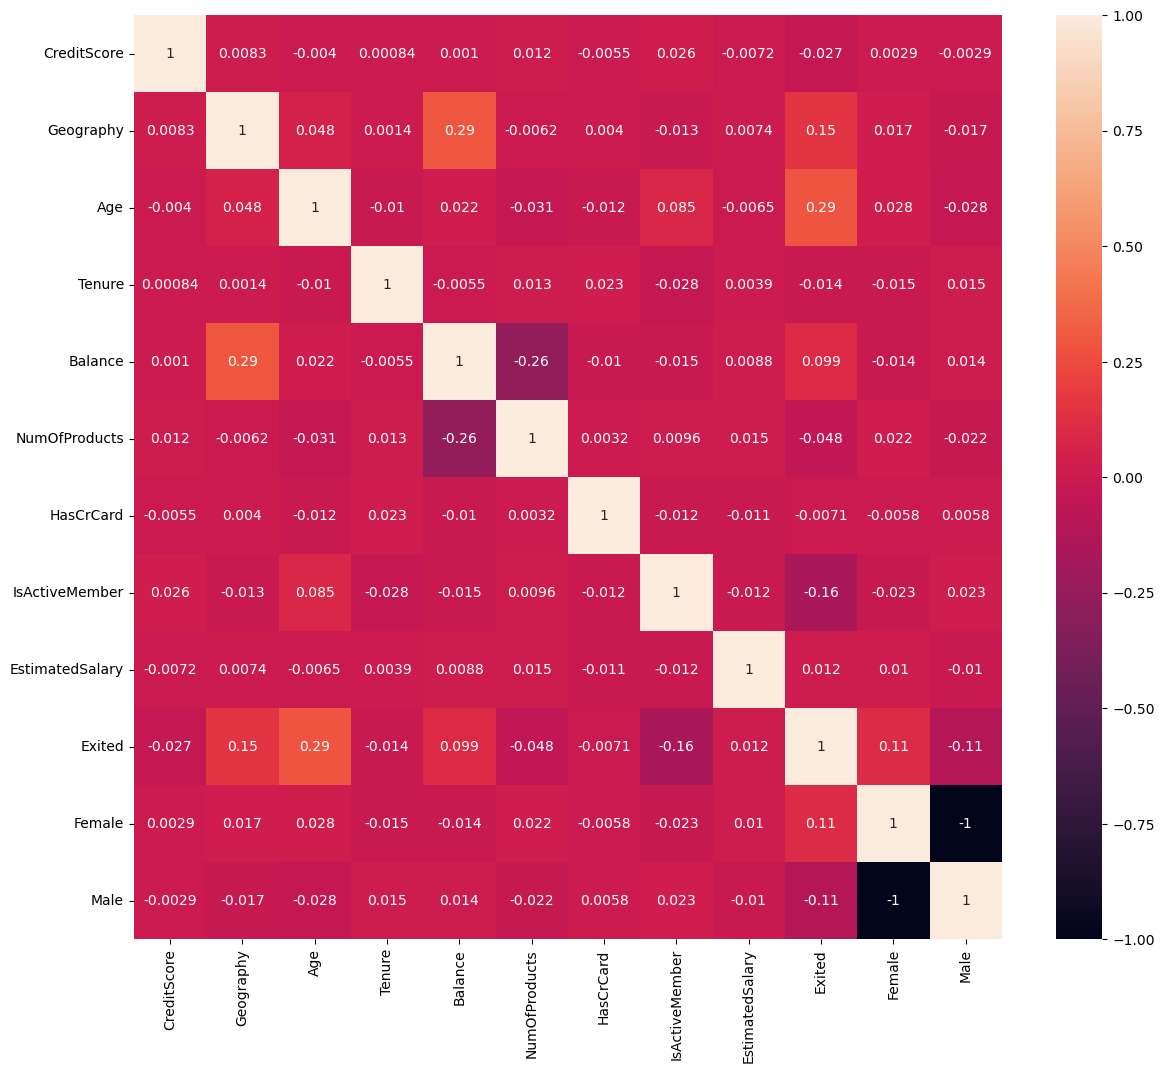

In [31]:
plt.figure(figsize=(14,12))
sns.heatmap(Data.corr(),annot=True)

In [32]:
x  = Data.iloc[:,[1,2,7,10,11]].values
y = Data.iloc[:,9].values

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.25)

In [34]:
x_train.shape

(7500, 5)

In [35]:
x_test.shape

(2500, 5)

In [36]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.losses import BinaryCrossentropy

In [43]:
def build_model(hp):
    model = keras.Sequential()
    hp_units = hp.Int('units', min_value = 5 , max_value = 100 ,step = 10)
    #model.add(keras.layers.Dense(hp.Choice('units',[5,10,15,20,25,30,35,40]),activation='relu'))
    model.add(keras.layers.Dense(units=hp_units , activation = 'relu'))
    model.add(keras.layers.Dense(1 , activation= 'sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2 , 1e-3 , 1e-4])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate) , loss = keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model;

In [38]:
#tuner = keras_tuner.Hyperband(build_model, max_epochs= 10)


In [39]:
#tuner.search(x_train , y_train , epochs = 50 , validation_split = 0.2 )

In [46]:
tuner = keras_tuner.RandomSearch(hypermodel=build_model ,objective='val_loss',max_trials=5,
                                executions_per_trial = 3, directory = 'document',project_name = 'Ai churn classification')


In [47]:
tuner.search(x_train,y_train,epochs = 10 ,validation_data = (x_test , y_test))

Trial 5 Complete [00h 00m 14s]
val_loss: 0.4459363321463267

Best val_loss So Far: 0.44340654214223224
Total elapsed time: 00h 01m 15s
INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.results_summary()

Results summary
Results in document\Ai churn classification
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 3 summary
Hyperparameters:
units: 95
learning_rate: 0.01
Score: 0.44340654214223224

Trial 1 summary
Hyperparameters:
units: 45
learning_rate: 0.001
Score: 0.44464991490046185

Trial 2 summary
Hyperparameters:
units: 65
learning_rate: 0.01
Score: 0.4454662303129832

Trial 4 summary
Hyperparameters:
units: 65
learning_rate: 0.001
Score: 0.4459363321463267

Trial 0 summary
Hyperparameters:
units: 25
learning_rate: 0.001
Score: 0.46053119500478107


In [49]:
best_hp = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [52]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hp.get('units')} and the optimal learning rate for the optimizer
is {best_hp.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 95 and the optimal learning rate for the optimizer
is 0.01.



In [53]:
model1 = tuner.hypermodel.build(best_hp)

In [54]:
history = model1.fit(x_train,y_train,epochs = 50 ,validation_split=0.2)

Epoch 1/50
188/188 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7760 - val_loss: 0.4814 - val_accuracy: 0.7867
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7957 - val_loss: 0.4248 - val_accuracy: 0.8173
Epoch 3/50
188/188 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7983 - val_loss: 0.4231 - val_accuracy: 0.8173
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8042 - val_loss: 0.4493 - val_accuracy: 0.8100
Epoch 5/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8057 - val_loss: 0.4226 - val_accuracy: 0.8207
Epoch 6/50
188/188 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8068 - val_loss: 0.4214 - val_accuracy: 0.8193
Epoch 7/50
188/188 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8087 - val_loss: 0.4253 - val_accuracy: 0.8173
Epoch 

In [55]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

In [56]:
best_epoch

33

In [57]:
hypermodel = tuner.hypermodel.build(best_hp)
hypermodel.fit(x_train , y_train, epochs = best_epoch, validation_split = 0.2)

Epoch 1/33
188/188 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7838 - val_loss: 0.5607 - val_accuracy: 0.7293
Epoch 2/33
188/188 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7777 - val_loss: 0.4248 - val_accuracy: 0.8240
Epoch 3/33
188/188 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8015 - val_loss: 0.6212 - val_accuracy: 0.6987
Epoch 4/33
188/188 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8007 - val_loss: 0.4808 - val_accuracy: 0.8080
Epoch 5/33
188/188 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8108 - val_loss: 0.4577 - val_accuracy: 0.8087
Epoch 6/33
188/188 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.8032 - val_loss: 0.4252 - val_accuracy: 0.8173
Epoch 7/33
188/188 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8023 - val_loss: 0.4270 - val_accuracy: 0.8113
Epoch 

In [58]:
eval_result = hypermodel.evaluate(x_test,y_test)

79/79 [==============================] - 0s 984us/step - loss: 0.4446 - accuracy: 0.8124


In [63]:
prediction = hypermodel.predict(x_test)
prediction = (prediction > 0.5).astype(np.float32)

79/79 [==============================] - 0s 889us/step


In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,y_test)*100,'%')

81.24 %
